In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [203]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/WIPRO.csv")

In [204]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [205]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [206]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,754.857303,756.799981,772.478364,738.150886,754.522418,754.474783,755.165515,2.236123e+06,1.024537e+14,48112.935668,9.957321e+05,0.459096
std,794.521897,803.371567,825.259513,768.613272,794.383479,794.159260,795.825682,4.827183e+06,1.741585e+14,46662.502048,1.324731e+06,0.185192
min,162.350000,163.100000,171.350000,159.400000,161.800000,162.350000,166.440000,1.003000e+03,4.355942e+11,692.000000,8.242000e+03,0.036400
25%,380.525000,380.575000,386.900000,374.475000,380.612500,380.525000,380.480000,6.937025e+05,4.319006e+13,25021.000000,3.023500e+05,0.332100
50%,503.400000,504.000000,510.800000,494.500000,503.800000,503.250000,503.450000,1.152270e+06,6.579357e+13,36659.500000,6.432110e+05,0.483000
75%,679.225000,680.000000,690.887500,670.812500,679.925000,678.687500,680.795000,2.004576e+06,1.075259e+14,55772.750000,1.197829e+06,0.596700
max,9587.450000,10350.000000,10350.000000,8928.350000,9640.000000,9587.450000,9607.140000,1.303677e+08,5.075003e+15,793471.000000,3.554140e+07,0.939400


In [207]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [208]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [209]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [210]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [211]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [212]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [213]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,1.436059,0.187735,480.30,9314644,NaN
5302,1.247401,0.758205,485.05,7209467,NaN
5303,2.483117,0.710096,489.30,9615534,NaN
5304,1.461808,-0.578445,489.85,7641133,NaN
5305,4.598406,0.254323,492.75,29115571,NaN


In [214]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [215]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [216]:
#Define the prediction model
model = RandomForestRegressor()

In [217]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [218]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8723100965855164


In [219]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [220]:
predictions = model.predict(X_Check)

In [221]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

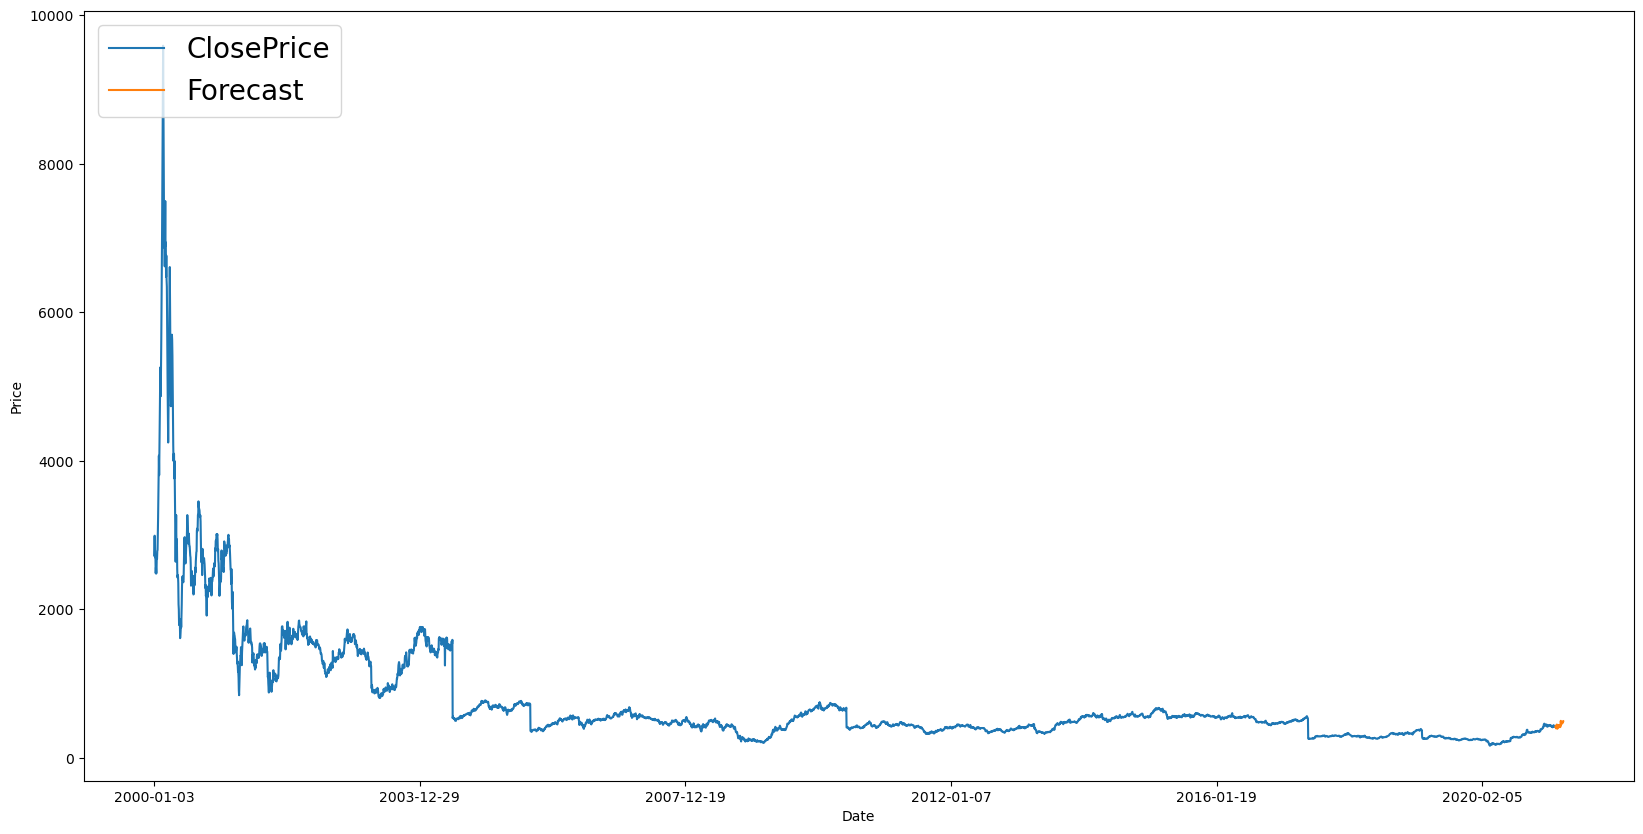

In [222]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')